**Library Importing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from  xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn import tree
from scipy import stats
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

##Data Loading

In [2]:
df=pd.read_csv('/content/hypothyroid.csv')#read the file

In [3]:
df.head(5)

,class,Age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hyperthyroid,pregnant,goitre,Thyroid_Stimulating_Harmone,triiodothyronine,Total_Thyroxine,T4U,Free_Thyroxine_Index,thyroxin_binding_globulin
0,hypothyroid,72,f,f,f,f,f,f,f,30,0.6,15,1.48,10,?
1,hypothyroid,15,t,f,f,f,f,f,f,145,1.7,19,1.13,17,?
2,hypothyroid,24,f,f,f,f,f,f,f,0,0.2,4,1,0,?
3,hypothyroid,24,f,f,f,f,f,f,f,430,0.4,6,1.04,6,?
4,hypothyroid,77,f,f,f,f,f,f,f,7.3,1.2,57,1.28,44,?


In [4]:
df.describe()#describe the data

,class,Age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hyperthyroid,pregnant,goitre,Thyroid_Stimulating_Harmone,triiodothyronine,Total_Thyroxine,T4U,Free_Thyroxine_Index,thyroxin_binding_globulin
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,2,2,2,2,2,2,2,240,70,269,159,281,53
top,negative,?,f,f,f,f,f,f,f,0,?,?,?,?,?
freq,3012,446,2702,3108,3121,3059,2920,3100,3064,894,695,249,248,247,2903


In [5]:
df.shape

(3163, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   class                        3163 non-null   object
 1   Age                          3163 non-null   object
 2   on_thyroxine                 3163 non-null   object
 3   query_on_thyroxine           3163 non-null   object
 4   on_antithyroid_medication    3163 non-null   object
 5   thyroid_surgery              3163 non-null   object
 6   query_hyperthyroid           3163 non-null   object
 7   pregnant                     3163 non-null   object
 8   goitre                       3163 non-null   object
 9   Thyroid_Stimulating_Harmone  3163 non-null   object
 10  triiodothyronine             3163 non-null   object
 11  Total_Thyroxine              3163 non-null   object
 12  T4U                          3163 non-null   object
 13  Free_Thyroxine_Index         3163

In [7]:
df['class'].unique()

array(['hypothyroid', 'negative'], dtype=object)

**Data** **Preprocessing**

In [8]:
df.replace("?", np.nan, inplace=True)#replace ? with nan

In [9]:
df.replace(np.nan, 0, inplace=True)#replace nan with 0

In [10]:
df.isna().sum()#check nan

class                          0
Age                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hyperthyroid             0
pregnant                       0
goitre                         0
Thyroid_Stimulating_Harmone    0
triiodothyronine               0
Total_Thyroxine                0
T4U                            0
Free_Thyroxine_Index           0
thyroxin_binding_globulin      0
dtype: int64

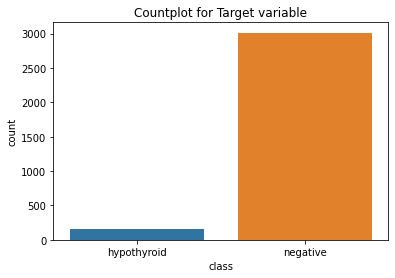

In [11]:
sns.countplot(x='class',data=df)
plt.title("Countplot for Target variable");#number of cases plot

In [12]:
df.replace("hypothyroid",1, inplace=True)
df.replace("negative",0, inplace=True)#fill nan values

In [13]:
class_count_0, class_count_1 = df['class'].value_counts()

# Separate class
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (3012, 15)
class 1: (151, 15)


In [14]:
class_1_over = class_1.sample(class_count_0, replace=True)

over_sample = pd.concat([class_1_over, class_0], axis=0)

In [15]:
over_sample['class'].value_counts()

1    3012
0    3012
Name: class, dtype: int64

In [16]:
positive_df = over_sample[over_sample['class']== 1 ]#hypothyroid class dataframe


In [17]:
positive_df['class'].value_counts()

1    3012
Name: class, dtype: int64

In [18]:
positive_df = over_sample[over_sample['class']== 1]

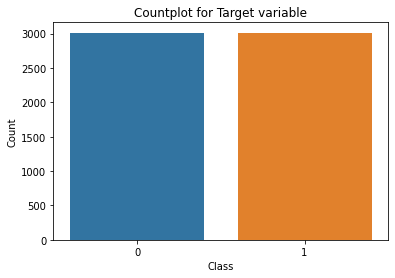

In [19]:
sns.countplot(x='class',data=over_sample)
plt.title("Countplot for Target variable")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##Exploratory Analysis


In [20]:
df2=df.copy()

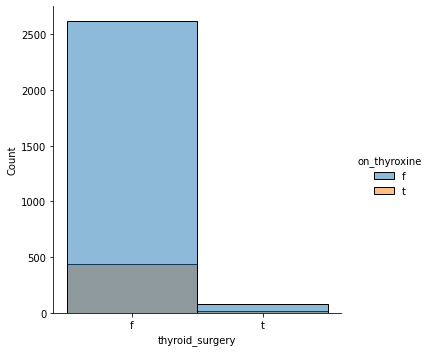

In [66]:
sns.displot(df2, x="thyroid_surgery",hue='on_thyroxine')#graph thyroid surgery with filter on_thyroxine

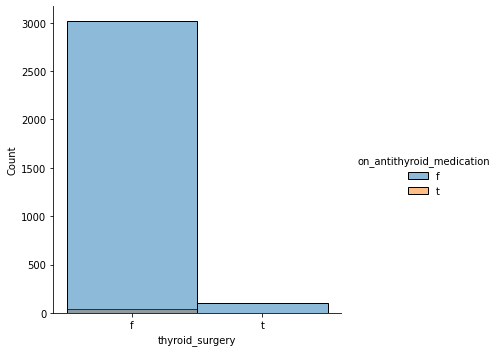

In [64]:
sns.displot(df2, x="thyroid_surgery",hue='on_antithyroid_medication')

In [22]:
over_sample["Thyroid_Stimulating_Harmone"] = pd.to_numeric(over_sample["Thyroid_Stimulating_Harmone"])#change to numeric format

In [23]:
over_sample["Thyroid_Stimulating_Harmone"] = pd.to_numeric(over_sample["Thyroid_Stimulating_Harmone"])#change to numeric format
over_sample["triiodothyronine"] = pd.to_numeric(over_sample["triiodothyronine"])
over_sample["Total_Thyroxine"] = pd.to_numeric(over_sample["Total_Thyroxine"])
over_sample["T4U"] = pd.to_numeric(over_sample["T4U"])
over_sample["Free_Thyroxine_Index"] = pd.to_numeric(over_sample["Free_Thyroxine_Index"])
over_sample["thyroxin_binding_globulin"] = pd.to_numeric(over_sample["thyroxin_binding_globulin"])

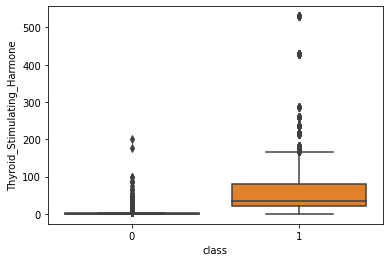

In [24]:
sns.boxplot(x = 'class', y = 'Thyroid_Stimulating_Harmone',data=over_sample)#outliers selection 

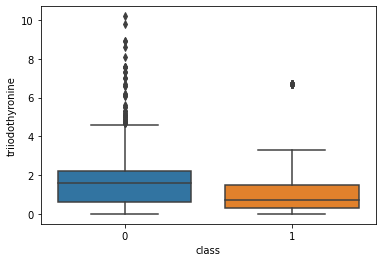

In [25]:
sns.boxplot(x = 'class', y = 'triiodothyronine',data=over_sample)


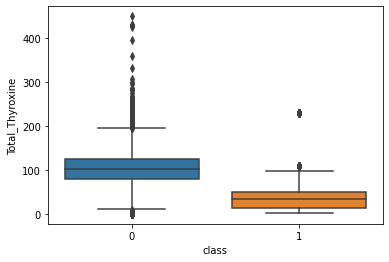

In [26]:
sns.boxplot(x = 'class', y = 'Total_Thyroxine',data=over_sample)


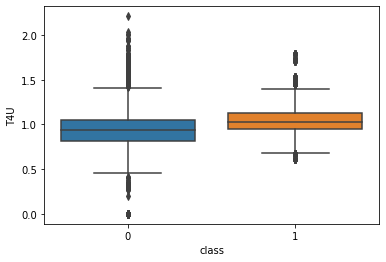

In [27]:
sns.boxplot(x = 'class', y = 'T4U',data=over_sample)

In [28]:
over_sample.replace("?", np.nan, inplace=True)
over_sample.replace("f",1, inplace=True)
over_sample.replace(np.nan, 0, inplace=True)
over_sample.replace("t",0, inplace=True)
over_sample.replace("hypothyroid",1, inplace=True)
over_sample.replace("negative",0, inplace=True)#fill nan values

In [29]:
over_sample['Thyroid_Stimulating_Harmone'] = over_sample["Thyroid_Stimulating_Harmone"].astype(int)#change datatype to int
over_sample['triiodothyronine'] = over_sample["triiodothyronine"].astype(int)
over_sample["Total_Thyroxine"] = pd.to_numeric(over_sample["Total_Thyroxine"])
over_sample["T4U"] = pd.to_numeric(over_sample["T4U"])
over_sample["Free_Thyroxine_Index"] = pd.to_numeric(over_sample["Free_Thyroxine_Index"])
over_sample["thyroxin_binding_globulin"] = pd.to_numeric(over_sample["thyroxin_binding_globulin"])
over_sample['Age'] = over_sample["Age"].astype(int)
over_sample['Total_Thyroxine'] =over_sample["Total_Thyroxine"].astype(int)
over_sample['T4U'] =over_sample["T4U"].astype(int)
over_sample['Free_Thyroxine_Index'] = over_sample["Free_Thyroxine_Index"].astype(int)
over_sample['thyroxin_binding_globulin'] = over_sample["thyroxin_binding_globulin"].astype(int)

In [30]:
over_sample.dtypes

class                          int64
Age                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hyperthyroid             int64
pregnant                       int64
goitre                         int64
Thyroid_Stimulating_Harmone    int64
triiodothyronine               int64
Total_Thyroxine                int64
T4U                            int64
Free_Thyroxine_Index           int64
thyroxin_binding_globulin      int64
dtype: object

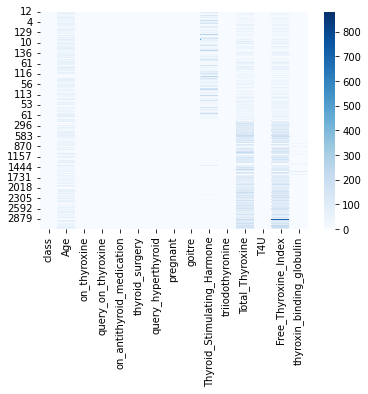

In [63]:
sns.heatmap(over_sample,cmap="Blues")#correlation heatmap

In [32]:
corr_values = abs(over_sample[over_sample.columns[0:]].corr()['class'][:])
corr_values = corr_values.drop('class')
print(corr_values)

Age                            0.103616
on_thyroxine                   0.086223
query_on_thyroxine             0.095991
on_antithyroid_medication      0.032896
thyroid_surgery                0.080388
query_hyperthyroid             0.070521
pregnant                       0.053176
goitre                         0.017396
Thyroid_Stimulating_Harmone    0.516687
triiodothyronine               0.264411
Total_Thyroxine                0.633446
T4U                            0.257325
Free_Thyroxine_Index           0.616390
thyroxin_binding_globulin      0.134101
Name: class, dtype: float64


In [33]:
def holdout(over_sample):
  x = over_sample[corr_values.index]
  y = over_sample['class']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) #train test split
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(over_sample)

##Model Making

In [35]:
classifiers1 = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01),
    'Logistic Regression': LogisticRegression(max_iter=500),
    "Support Vector Machine":SVC(),
    "Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced',random_state = 1),
    "ExtraTrees": ExtraTreesClassifier(class_weight = 'balanced',random_state = 1),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
}#various ML algorithms

In [54]:
def classification1(classifiers, X_train, X_test, y_train, y_test):
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "FScore","Auc_Score"])#dataframe for various values
  roc = pd.DataFrame(columns=["Classifier", 
                                'fp1'])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)#fitting of train data
            y_pred = clf.predict(X_test)#predict of data
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')#precision recall score
            cf_matrix = confusion_matrix(y_test, y_pred)
            fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
            random_probs = [0 for i in range(len(y_test))]
            p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
            # auc scores
            auc_score1 = roc_auc_score(y_test, y_pred)
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "FScore":round(fs, 4),"Auc_Score":round(auc_score1, 4)}, ignore_index=True)
  res.set_index("FScore", inplace=True)
  res.sort_values(by="FScore", ascending=False, inplace=True)   
  return res

In [55]:
res=classification1(classifiers1,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
res=res.reset_index()

In [57]:
res['FScore']=res['FScore']*100
res['Precision']=res['Precision']*100
res['Recall']=res['Recall']*100
res['Auc_Score']=res['Auc_Score']*100
res['Accuracy']=res['Accuracy']*100 
res.head(10)

,FScore,Classifier,Accuracy,Precision,Recall,Auc_Score
0,99.83,Random Forest,99.83,99.84,99.83,99.83
1,99.72,Decision Tree,99.72,99.73,99.71,99.71
2,99.72,ExtraTrees,99.72,99.73,99.71,99.71
3,99.28,Nearest Neighbors,99.28,99.31,99.26,99.26
4,99.06,XGBClassifier,99.06,99.11,99.03,99.03
5,98.45,MLPClassifier,98.45,98.54,98.40,98.40
6,96.68,Support Vector Machine,96.68,96.69,96.67,96.67
7,95.57,Logistic Regression,95.58,95.57,95.61,95.61


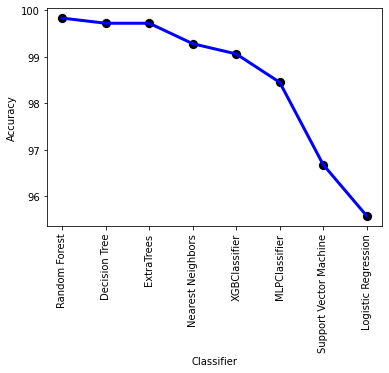

In [58]:
sns.scatterplot(x="Classifier", y="Accuracy", data=res,s=100,color='black')
sns.lineplot(x="Classifier", y="Accuracy",data=res, color='blue', linewidth=3, markers=True)
plt.xticks(rotation=90)
plt.show()